create dictionary from a list of documents and from text files (from one as well as from more than one). Now, in this section, we will create a bag-of-words (BoW) corpus. In order to work with Gensim, it is one of the most important objects we need to familiarise with. Basically, it is the corpus that contains the word id and its frequency in each document.

Creating a BoW Corpus
As discussed, in Gensim, the corpus contains the word id and its frequency in every document. We can create a BoW corpus from a simple list of documents and from text files. What we need to do is, to pass the tokenised list of words to the object named Dictionary.doc2bow(). So first, lets start by creating BoW corpus using a simple list of documents.

From a Simple List of Sentences

create BoW corpus from a simple list containing three sentences.

method 1 to create env
Optional: Check dependencies (clean install)
If it still doesn't work, consider creating a clean environment using:


conda create -n gensimenv python=3.10 gensim=4.3.1 scipy=1.10.1
conda activate gensimenv
Then run Jupyter from within that:

pip install notebook
jupyter notebook

In [2]:
pip install gensim==4.3.1 scipy==1.10.1

  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/15.8 MB 9.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/15.8 MB 9.4 MB/s eta 0:00:02
   --------------- ------------------------ 6.0/15.8 MB 10.0 MB/s eta 0:00:01
   --------------------- ------------------ 8.4/15.8 MB 10.0 MB/s eta 0:00:01
   ---------------------------- ----------- 11.3/15.8 MB 11.0 MB/s eta 0:00:01
   ------------------------------------- -- 14.7/15.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 15.8/15.8 MB 11.4 MB/s eta 0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.2.6

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [6]:
#reinstall
!pip install scipy==1.10.1 --force-reinstall

  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl.metadata (58 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.26.4

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.26.4:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-1.26.4
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -----------------

In [1]:
import scipy
import gensim

print("SciPy version:", scipy.__version__)
print("Gensim version:", gensim.__version__)

SciPy version: 1.10.1
Gensim version: 4.3.1


In [2]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess

In [3]:
doc_list = [
   "Hello, how are you?", "How do you do?", 
   "Hey what are you doing? yes you What are you doing?"
]

In [4]:
doc_tokenized = [simple_preprocess(doc) for doc in doc_list]

In [5]:
#Create an object of corpora.Dictionary() as follows −
dictionary = corpora.Dictionary()

In [6]:
#Now pass these tokenised sentences to dictionary.doc2bow() objectas follows −
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

In [7]:
print(BoW_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(2, 1), (3, 1), (4, 2)], [(0, 2), (3, 3), (5, 2), (6, 1), (7, 2), (8, 1)]]


The above output shows that the word with id=0 appears once in the first document (because we have got (0,1) in the output) and so on.We can also convert these ids to words but for this we need our dictionary to do the conversion as follows −

In [8]:
id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
print(id_words)

[[('are', 1), ('hello', 1), ('how', 1), ('you', 1)], [('how', 1), ('you', 1), ('do', 2)], [('are', 2), ('you', 3), ('doing', 2), ('hey', 1), ('what', 2), ('yes', 1)]]


In [9]:
doc_list = [
   "Hello, how are you?", "How do you do?", 
   "Hey what are you doing? yes you What are you doing?"
]

From a Text File

we will be creating BoW corpus from a text file. For this, we have saved the document, used in previous example, in the text file named doc.txt..

Gensim will read the file line by line and process one line at a time by using simple_preprocess. In this way, it doesnt need to load the complete file in memory all at once.

In [10]:
dictionary.save_as_text(r'C:\Users\Welcome\Documents\doc_list.txt')  # if you really want text format

In [11]:
import os
print(os.path.exists(r'C:\Users\Welcome\Documents\doc_list.txt'))

True


In [12]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

the following line of codes will make read the documents from doc.txt and tokenised it −

In [13]:

doc_tokenized = [
    simple_preprocess(line, deacc=True)
    for line in open(r'C:\Users\Welcome\Documents\doc_list.txt', encoding='utf-8')
]

# Now create dictionary from tokenized docs
dictionary = corpora.Dictionary(doc_tokenized)

In [14]:
#we need to pass these tokenized words into dictionary.doc2bow() object
BoW_corpus = [
   dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized
]
print(BoW_corpus)

[[], [(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)]]


The doc.txt file have the following content −

CNTK formerly known as Computational Network Toolkit is a free easy-to-use open-source commercial-grade toolkit that enable us to train deep learning algorithms to learn like the human brain.

Saving and Loading a Gensim Corpus
We can save the corpus with the help of following script −

In [15]:
from gensim import corpora


In [19]:
import getpass
print(getpass.getuser())

Welcome


In [18]:
import os
from gensim import corpora

save_dir = r'C:\Users\Welcome\Desktop'
os.makedirs(save_dir, exist_ok=True)

corpora.MmCorpus.serialize(os.path.join(save_dir, 'BoW_corpus.mm'), BoW_corpus)

In [20]:
#use os.path.expanduser() to automatically detect your desktop path:


import os
from gensim import corpora

desktop = os.path.join(os.path.expanduser("~"), "Downloads")
file_path = os.path.join(desktop, "BoW_corpus.mm")

corpora.MmCorpus.serialize(file_path, BoW_corpus)

In [21]:
file_path

'C:\\Users\\Welcome\\Downloads\\BoW_corpus.mm'

In [22]:
#Save to a Safer Folder (e.g., Current Directory)
#If permissions are tight, just save to the current working directory:

corpora.MmCorpus.serialize('BoW_corpus.mm', BoW_corpus)


Gensim : It is an open source library in python written by Radim Rehurek which is used in unsupervised topic modelling and natural language processing. It is designed to extract semantic topics from documents. It can handle large text collections. Hence it makes it different from other machine learning software packages which target memory processing. Gensim also provides efficient multicore implementations for various algorithms to increase processing speed. It provides more convenient  facilities for text processing than other packages like Scikit-learn, R etc.
This tutorial will cover these concepts: 
 

Create a Corpus from a given Dataset
Create a TFIDF matrix in Gensim
Create Bigrams and Trigrams with Gensim
Create Word2Vec model using Gensim
Create Doc2Vec model using Gensim
Create Topic Model with LDA
Create Topic Model with LSI
Compute Similarity Matrices
Summarize text documents

Let us understand what some of the below mentioned terms mean before moving forward.
 

Corpus: A collection of text documents.
Vector: Form of representing text.
Model: Algorithm used to generate representation of data.
Topic Modelling: It is an information mining tool which is used to extract semantic topics from documents.
Topic: A repeating group of words frequently occurring together.

 

For example:
    You have a document which consists of words like - 
    bat, car, racquet, score, glass, drive, cup, keys, water, game, steering, liquid
These can be grouped into different topics as-
Topic 1	Topic 2	Topic 3
glass	bat	car
cup	racquet	drive
water	score	keys
liquid	game	steering

Some of the Topic Modelling Techniques are - 
 

Latent Semantic Indexing(LSI)
Latent Dirichlet Allocation(LDA)


Step 1: Create a Corpus from a given Dataset 
You need to follow these steps to create your corpus: 
 

Load your Dataset
Preprocess the Dataset
Create a Dictionary
Create Bag of Words Corpus
1.1 Load your Dataset: 
You can have a .txt file as your dataset or you can also load datasets using the Gensim Downloader API. 
Code: 

In [2]:
#import os

# open the text file as an object
#doc = open('sample_data.txt', encoding ='utf-8')

Gensim Downloader API: This is a module available in the Gensim library which is an API for downloading, getting information and loading datasets/models.

In [3]:
import gensim.downloader as api

# check available models and datasets
info_datasets = api.info()
print(info_datasets)
#>{'corpora': 
#>    {'semeval-2016-2017-task3-subtaskBC': 
#>        {'num_records': -1, 'record_format': 'dict', 'file_size': 6344358, ....}

# information of a particular dataset
dataset_info = api.info("text8")

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1, 'record_format': 'dict', 'file_size': 6344358, 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py', 'license': 'All files released for the task are free for general research use', 'fields': {'2016-train': ['...'], '2016-dev': ['...'], '2017-test': ['...'], '2016-test': ['...']}, 'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.', 'checksum': '701ea67acd82e75f95e1d8e62fb0ad29', 'file_name': 'semeval-2016-2017-task3-subtaskBC.gz',

In [4]:
dataset_info

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [5]:
# load the "text8" dataset
dataset = api.load("text8")

In [7]:
dataset

In [6]:
# load a pre-trained model
word2vec_model = api.load('word2vec-google-news-300')

In [8]:
word2vec_model

Here we are going to consider a text file as raw dataset which consist of data from a wikipedia page. 
1.2 Preprocess the Dataset 
Text preprocessing: In natural language preprocessing, text preprocessing is the practice of cleaning and preparing text data. For this purpose we will use the simple_preprocess( ) function.This function returns a list of tokens after tokenizing and normalizing them. 

If deacc=True, it removes accents from letters, like:

"café" → "cafe"

"naïve" → "naive"

"façade" → "facade"

This helps normalize text — so words with accents aren't treated as completely different words.

In [15]:
sample_text = """Data science is an interdisciplinary field that uses scientific methods. 
Machine learning allows systems to learn automatically from data. 
Natural language processing helps machines understand human language. 
Deep learning is a subset of machine learning based on neural networks. 
Big data technologies handle massive volumes of information efficiently."""

with open('sample_data.txt', 'w', encoding='utf-8') as f:
    f.write(sample_text)

In [16]:
import gensim
import os
from gensim.utils import simple_preprocess

# open the text file as an object
doc = open('sample_data.txt', encoding ='utf-8')

# preprocess the file to get a list of tokens
tokenized =[]
for sentence in doc.read().split('.'):
  # the simple_preprocess function returns a list of each sentence
  tokenized.append(simple_preprocess(sentence, deacc = True))

In [17]:
tokenized

[['data',
  'science',
  'is',
  'an',
  'field',
  'that',
  'uses',
  'scientific',
  'methods'],
 ['machine',
  'learning',
  'allows',
  'systems',
  'to',
  'learn',
  'automatically',
  'from',
  'data'],
 ['natural',
  'language',
  'processing',
  'helps',
  'machines',
  'understand',
  'human',
  'language'],
 ['deep',
  'learning',
  'is',
  'subset',
  'of',
  'machine',
  'learning',
  'based',
  'on',
  'neural',
  'networks'],
 ['big',
  'data',
  'technologies',
  'handle',
  'massive',
  'volumes',
  'of',
  'information',
  'efficiently'],
 []]

Create a Dictionary 
Now we have our preprocessed data which can be converted into a dictionary by using the corpora.Dictionary( ) function. This dictionary is a map for unique tokens.

In [18]:
from gensim import corpora
# storing the extracted tokens into the dictionary
my_dictionary = corpora.Dictionary(tokenized)
print(my_dictionary)

Dictionary<38 unique tokens: ['an', 'data', 'field', 'is', 'methods']...>


In [22]:
# save your dictionary to disk
my_dictionary.save('my_dictionary.dict')
my_dictionary

# load back
load_dict = corpora.Dictionary.load('my_dictionary.dict')
load_dict  

# save your dictionary as text file
from gensim.test.utils import get_tmpfile
tmp_fname = get_tmpfile("dictionary")
my_dictionary.save_as_text(tmp_fname)
tmp_fname

# load your dictionary text file
load_dict = corpora.Dictionary.load_from_text(tmp_fname)
load_dict

Create Bag of Words Corpus 
Once we have the dictionary we can create a Bag of Word corpus using the doc2bow( ) function. This function counts the number of occurrences of each distinct word, convert the word to its integer word id and then the result is returned as a sparse vector.

In [23]:
# converting to a bag of word corpus
BoW_corpus =[my_dictionary.doc2bow(doc, allow_update = True) for doc in tokenized]
print(BoW_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1)], [(3, 1), (13, 2), (14, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(1, 1), (28, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], []]


Saving Corpus on Disk: 
Code: To save/load your corpus 
 

In [24]:
from gensim.corpora import MmCorpus
from gensim.test.utils import get_tmpfile

output_fname = get_tmpfile("BoW_corpus.mm")

# save corpus to disk
MmCorpus.serialize(output_fname, BoW_corpus)

# load back the corpus
load_corpus = MmCorpus(output_fname)

In [25]:
load_corpus

Create a TFIDF matrix in Gensim 
TFIDF: Stands for Term Frequency - Inverse Document Frequency. It is a commonly used natural language processing model that helps you determine the most important words in each document in a corpus. This was designed for a modest-size corpora.
Some words might not be stopwords but may occur more often in the documents and may be of less importance. Hence these words need to be removed or down-weighted in importance. The TFIDF model takes the text that share a common language and ensures that most common words across the entire corpus don't show as keywords. You can build a TFIDF model using Gensim and the corpus you developed previously as:

In [ ]:
from gensim import corpora
# storing the extracted tokens into the dictionary
my_dictionary = corpora.Dictionary(tokenized)
print(my_dictionary)

In [ ]:
# converting to a bag of word corpus
BoW_corpus =[my_dictionary.doc2bow(doc, allow_update = True) for doc in tokenized]
print(BoW_corpus)

In [26]:
from gensim import models
import numpy as np

# Word weight in Bag of Words corpus
word_weight =[]
for doc in BoW_corpus:
  for id, freq in doc:
    word_weight.append([my_dictionary[id], freq])
print(word_weight)

[['an', 1], ['data', 1], ['field', 1], ['is', 1], ['methods', 1], ['science', 1], ['scientific', 1], ['that', 1], ['uses', 1], ['data', 1], ['allows', 1], ['automatically', 1], ['from', 1], ['learn', 1], ['learning', 1], ['machine', 1], ['systems', 1], ['to', 1], ['helps', 1], ['human', 1], ['language', 2], ['machines', 1], ['natural', 1], ['processing', 1], ['understand', 1], ['is', 1], ['learning', 2], ['machine', 1], ['based', 1], ['deep', 1], ['networks', 1], ['neural', 1], ['of', 1], ['on', 1], ['subset', 1], ['data', 1], ['of', 1], ['big', 1], ['efficiently', 1], ['handle', 1], ['information', 1], ['massive', 1], ['technologies', 1], ['volumes', 1]]


1. Create a dictionary from tokens

my_dictionary = corpora.Dictionary(tokenized)
tokenized is a list of tokenized sentences.

Dictionary() assigns each unique word an ID.

Example:


tokenized = [['machine', 'learning'], ['machine', 'vision']]
print(my_dictionary.token2id)
# {'machine': 0, 'learning': 1, 'vision': 2}
✅ 2. Convert to Bag-of-Words (BoW)

BoW_corpus = [my_dictionary.doc2bow(doc, allow_update=True) for doc in tokenized]
doc2bow(doc) converts a list of tokens into a list of (word_id, frequency) tuples.

allow_update=True tells the dictionary to update itself if it encounters new words (not needed here since you've already created the dictionary).

Example:


tokenized = [['machine', 'learning'], ['machine', 'vision']]
BoW_corpus = [[(0, 1), (1, 1)], [(0, 1), (2, 1)]]
Each sublist represents one document. Each tuple (id, freq) means:

Word with ID id appeared freq times in the document.

✅ 3. Extract word weights (word-frequency pairs)

word_weight = []
for doc in BoW_corpus:
    for id, freq in doc:
        word_weight.append([my_dictionary[id], freq])
For each document in the BoW corpus, loop over each (word_id, frequency) pair.

Use my_dictionary[id] to get the actual word.

Build a list of [word, frequency] entries.

🔎 Example output:


[['machine', 1], ['learning', 1], ['machine', 1], ['vision', 1]]
✅ Final Outputs:
my_dictionary → maps words to IDs

BoW_corpus → numerical BoW format of documents

word_weight → human-readable list of word-frequency pairs across all documents



In [27]:
#applying TFIDF model 
 # create TF-IDF model
tfIdf = models.TfidfModel(BoW_corpus, smartirs ='ntc')

# TF-IDF Word Weight
weight_tfidf =[]
for doc in tfIdf[BoW_corpus]:
  for id, freq in doc:
    weight_tfidf.append([my_dictionary[id], np.around(freq, decimals = 3)])
print(weight_tfidf)
# create TF-IDF mode

[['an', 0.363], ['data', 0.158], ['field', 0.363], ['is', 0.233], ['methods', 0.363], ['science', 0.363], ['scientific', 0.363], ['that', 0.363], ['uses', 0.363], ['data', 0.164], ['allows', 0.377], ['automatically', 0.377], ['from', 0.377], ['learn', 0.377], ['learning', 0.243], ['machine', 0.243], ['systems', 0.377], ['to', 0.377], ['helps', 0.316], ['human', 0.316], ['language', 0.632], ['machines', 0.316], ['natural', 0.316], ['processing', 0.316], ['understand', 0.316], ['is', 0.216], ['learning', 0.432], ['machine', 0.216], ['based', 0.335], ['deep', 0.335], ['networks', 0.335], ['neural', 0.335], ['of', 0.216], ['on', 0.335], ['subset', 0.335], ['data', 0.158], ['of', 0.233], ['big', 0.363], ['efficiently', 0.363], ['handle', 0.363], ['information', 0.363], ['massive', 0.363], ['technologies', 0.363], ['volumes', 0.363]]


The smartirs parameter in Gensim’s TfidfModel uses the SMART Information Retrieval System notation (developed by Cornell University) to specify TF-IDF weighting schemes.

smartirs='ntc'	Chooses the way TF-IDF is calculated: raw TF, log-IDF, and cosine normalization
freq in loop	Represents the TF-IDF weight for a term in a document



📘 smartirs='ntc' stands for:
Position	Meaning	Explanation
n	Term Frequency (TF)	Natural: raw count (e.g., how many times a word appears)
t	Inverse Document Frequency (IDF)	Logarithmic IDF: log(N / df) where N is total docs, df is doc frequency
c	Normalization	Cosine normalization of document vector



You can see that the words occurring frequently across the documents now have lower weights assigned.
Step 3: Creating Bigrams and Trigrams with Gensim 
Many words tend to occur in the content together. The words when occur together have a different meaning than as individuals. 
 

for example:
    Beatboxing --> the word beat and boxing individually have meanings of their own 
            but these together have a different meaning. 

Bigrams: Group of two words 
Trigrams: Group of three words
We will be using the text8 dataset here which can be downloaded using the Gensim downloader API 
Code: Building bigrams and trigrams
 

In [1]:
import gensim.downloader as api
from gensim.models.phrases import Phrases

# load the text8 dataset
dataset = api.load("text8")

# extract a list of words from the dataset
data =[]
for word in dataset:
  data.append(word)
              
# Bigram using Phraser Model              
bigram_model = Phrases(data, min_count = 3, threshold = 10)

print(bigram_model[data[0]])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working_class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans_culottes', 'of', 'the', 'french_revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative_way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken_up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived_from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political_philosophy', 'is', 'the', 'belief_that', 'rulers', 'are', 'unnecessary', 'and', 'should_be', 'abolished', 'although', 'there_are', 'differing_interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers_to', 'related', 'social_movements', 'that', 'advocate',

In [4]:
print(bigram_model[data[18]])

['one', 'two', 'six', 'km', 'by', 'one', 'one', 'four', 'eight', 'km', 'over', 'the', 'next', 'two', 'orbits', 'the', 'crew', 'continued', 'to', 'keep', 'check', 'of', 'the', 'spacecraft', 'and', 'to', 'observe', 'and', 'photograph', 'the', 'moon', 'during', 'the', 'third', 'pass', 'borman', 'read', 'a', 'small', 'prayer', 'for', 'his', 'church', 'as', 'he', 'was', 'meant', 'to', 'lay', 'read', 'during', 'the', 'midnight', 'service', 'at', 'st', 'christopher', 's', 'episcopal_church', 'near', 'seabrook', 'texas', 'but', 'due_to', 'the', 'apollo', 'eight', 'flight', 'was', 'unable', 'a', 'fellow', 'parishioner', 'and', 'engineer', 'at', 'mission_control', 'rod', 'rose', 'suggested_that', 'borman', 'read', 'the', 'prayer', 'which', 'could_be', 'recorded', 'and', 'then', 'replayed', 'during', 'the', 'service', 'it', 'was', 'as', 'the', 'spacecraft', 'came_out', 'from', 'behind', 'the', 'moon', 'for', 'its', 'fourth', 'pass', 'across', 'the', 'front', 'that', 'the', 'crew', 'witnessed', 'a

To create a Trigram we simply pass the above obtained bigram model to the same function. 

In [5]:
# Trigram using Phraser Model
trigram_model = Phrases(bigram_model[data], threshold = 10)

# trigram
print(trigram_model[bigram_model[data[0]]])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working_class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans_culottes', 'of', 'the', 'french_revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative_way', 'to_describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also_been', 'taken_up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived_from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political_philosophy', 'is', 'the', 'belief_that', 'rulers', 'are', 'unnecessary', 'and', 'should_be', 'abolished', 'although', 'there_are', 'differing_interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers_to', 'related', 'social_movements', 'that', 'advocate', 'the'

You're working with Gensim's phrase detection to find bigrams (multi-word phrases like new_york or machine_learning) in a large dataset. Let's walk through your code step by step.

✅ Full Code Explanation

import gensim.downloader as api
from gensim.models.phrases import Phrases


api: to download ready-made datasets (like text8)

Phrases: to detect multi-word expressions (bigrams, trigrams)

🔹 Step 1: Load the dataset

dataset = api.load("text8")
Loads the text8 corpus:

A pre-tokenized Wikipedia-based dataset with ~17 million words.

Format: a list of sentences, where each sentence is a list of lowercase words.

Example:


[['anarchism', 'originated', 'as', 'a', 'term', ...],
 ['the', 'word', 'anarchy', 'comes', 'from', 'the', ...],
 ...
]
🔹 Step 2: Flatten the dataset (❌ incorrect)

data = []
for word in dataset:
    data.append(word)
This does not work correctly because dataset is a list of sentences (list of word lists), and you're appending each sentence, not each word.

So data becomes a list of lists (just like dataset), but with an unnecessary copy.


data = list(dataset)  # or just use dataset directly
🔹 Step 3: Learn bigrams

bigram_model = Phrases(data, min_count=3, threshold=10)
This line creates a bigram model:

Parameter	Meaning
min_count=3	Ignore bigrams that appear in fewer than 3 sentences
threshold=10	Higher threshold = fewer phrases (more conservative merging)

The model looks for frequent word pairs like:

new + york → new_york

machine + learning → machine_learning

🔹 Step 4: Apply bigram model to a sentence

print(bigram_model[data[0]])
data[0] is the first sentence (a list of words).

bigram_model[data[0]] transforms it by merging frequent bigrams:

Input: ['new', 'york', 'is', 'a', 'city']

Output: ['new_york', 'is', 'a', 'city']


api.load("text8")	Loads a large tokenized English text dataset
Phrases(data)	Learns common word pairs (bigrams)
bigram_model[sentence]	Applies the learned bigram transformation

✅ Tip: Use Phraser for efficiency
You can convert the model to a faster version:


from gensim.models.phrases import Phraser
bigram_phraser = Phraser(bigram_model)

print(bigram_phraser[data[0]])
This speeds up inference and is lighter in memory.

Let me know if you'd like to go further with trigrams or use the bigrams for topic modeling or word embeddings!











✅ 1. Convert bigram model to a Phraser (for efficiency)

from gensim.models.phrases import Phraser

bigram_phraser = Phraser(bigram_model)  # lightweight & fast
print(bigram_phraser[data[0]])          # apply to first sentence
Phraser is a faster, optimized version of Phrases.

It uses the learned bigrams to transform sentences more efficiently.

✅ 2. Build Trigram Model on Top of Bigrams
Once you have bigrams, you can detect trigrams using the bigram-transformed data:


# Transform all sentences using bigram phraser
bigram_sentences = [bigram_phraser[sent] for sent in data]

# Train a trigram model on top of bigrams
trigram_model = Phrases(bigram_sentences, min_count=3, threshold=10)
trigram_phraser = Phraser(trigram_model)




Effect of threshold value
threshold value	Effect	Example Outcome
Low (e.g., 5)	More aggressive merging	More bigrams/trigrams detected (may include noisy or weak pairs)
High (e.g., 20)	More conservative merging	Only very strong, frequent phrases are combined

So:

threshold=10 is a balanced default.

threshold=5 might produce phrases like 'the_best', 'it_was' (not meaningful).

threshold=20 will only combine high-quality, meaningful phrases like 'machine_learning'.



# Apply trigram model to the data
print(trigram_phraser[bigram_sentences[0]])

['deep_learning_model', 'is', 'used', 'for', 'vision']
✅ 3. Use Bigrams/Trigrams for Topic Modeling (LDA)
Once your text is enriched with bigrams or trigrams, it becomes more informative for topic modeling:


from gensim import corpora, models

# Create dictionary and corpus from trigram-transformed data
dictionary = corpora.Dictionary(trigram_phraser[bigram_phraser[sent]] for sent in data)
corpus = [dictionary.doc2bow(trigram_phraser[bigram_phraser[sent]]) for sent in data]

dictionary (Gensim Dictionary Object)
✅ What it is:
A mapping of unique words to IDs.

✅ Example:

['machine_learning', 'is', 'fun']
Gensim will build:


{
    0: 'machine_learning',
    1: 'is',
    2: 'fun'
}

dictionary.token2id
✅ Purpose:
Helps translate words to integers

dictionary is Required to build the corpus

Used to decode topic words after modeling

📘 2. corpus (Bag of Words Representation)
✅ What it is:
A numerical representation of documents using the dictionary.

Each document becomes a list of (word_id, frequency) pairs:


[(0, 1), (1, 1), (2, 1)]
This means:

Word with ID 0 appeared 1 time

Word with ID 1 appeared 1 time, etc.

So, if your dataset has 10,000 documents, corpus will be a list of 10,000 such lists — one per document.

✅ Purpose:
Used as input to models like:

TfidfModel

LdaModel

Similarity queries

🔁 How they work together:

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
dictionary: maps tokens → IDs

doc2bow(): turns a token list into a bag-of-words vector using the dictionary

🎯 Quick Analogy
Concept	Like in real life	Example
dictionary	Vocabulary list	'apple' → 0, 'banana' → 1
corpus	List of shopping lists	[(0, 2), (1, 1)] = 2 apples, 1 banana


# Train LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)


id2word=dictionary — What it does:
📌 It tells the LDA model what each word ID actually means (i.e., which word it represents).
🧠 Why is this needed?
Your corpus is in Bag-of-Words (BoW) format:


[(0, 2), (3, 1), (7, 1)]
This means:

Word with ID 0 appears 2 times

Word with ID 3 appears once, etc.

But the model doesn't know what ID 0, ID 3, etc. actually are.

So:


id2word=dictionary
lets LDA map back the numeric IDs to the actual words, like:

0 → "machine_learning"

3 → "neural_network"

7 → "data"

Without this, the model would produce topics like:

markdown

Topic 0: 0*0.21 + 3*0.13 + 7*0.07 ...
Which is meaningless to humans.

With id2word=dictionary, you get:

yaml

Topic 0: "machine_learning": 0.21, "neural_network": 0.13, "data": 0.07
✅ Summary
Parameter	Purpose
corpus=corpus	Document data in BoW format (word ID and frequency)
id2word=dictionary	Maps word IDs to actual words for interpretability

Without id2word, your topics would be numeric — not human-readable.


# Display topics
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx+1}: {topic}")
🧠 Why use bigrams/trigrams in LDA?
Because they capture multi-word concepts (like machine_learning, natural_language_processing) that are critical to topic interpretation.






Both LDA (Latent Dirichlet Allocation) and LSA (Latent Semantic Analysis) are powerful techniques used for topic modeling and dimensionality reduction in text data, but they are fundamentally different in how they work and what assumptions they make.

Here’s a clear and practical comparison:

📘 1. What they are
Method	Full Form	Purpose
LDA	Latent Dirichlet Allocation	Probabilistic topic modeling
LSA	Latent Semantic Analysis (also called LSI)	Matrix factorization for finding hidden structure in text

🔍 2. How they work
Feature	   LDA	                                                                       LSA
Type	Probabilistic generative model	                                 Linear algebra-based (Singular Value Decomposition)
Input	Bag-of-Words or TF-IDF matrix	                                 TF-IDF matrix
Output	Distribution of topics in docs and words in topics	              Document and word vectors in reduced dimensions
Model structure	Documents → topics → words	                               Documents and words → reduced latent space

🔬 3. Mathematics Behind
Concept	LDA	is Assumes each document is a mixture of topics, and each topic is a distribution of words	Uses Dirichlet distributions to model this mixture	 LSA Applies Singular Value Decomposition (SVD) to decompose the term-document matrix
LDA is Based on Bayesian probability	LSA is Based on linear algebra	

📊 4. Interpretability
LDA                                                                                   	LSA
Highly interpretable – each topic is a distribution over words	               Less interpretable – topics are vectors in reduced space	
Used for human-readable topics	                                                Used for semantic similarity, not for interpretable topics	

💡 5. Use Cases
Scenario	Prefer                                                   LDA	Prefer LSA
You want to extract readable topics (like "health", "technology")	✅ Yes	    ❌ Not ideal
You want to find semantic similarity (like search or ranking)	   ✅ Possible	✅ Better (faster, simpler)
You want a probabilistic model for topic generation	                 ✅ Yes  	❌ No
You need speed and simplicity	                                    ❌ Slower	✅ Faster

🧪 Example Outputs
LDA Output:

Topic 1:
- 'neural': 0.2
- 'network': 0.15
- 'learning': 0.12
LSA Output:

Topic 1: [0.5, -0.3, 0.2, ...]  ← vector, not easily interpretable
✅ Summary
Feature	           LDA	                                                        LSA
Type	Probabilistic	                                                 Algebraic
Topic   Interpretability	High (readable)	                            Low (abstract vectors)
      Performance	Slower	                                                  Faster
Dimensionality Reduction	No (but captures structure)	                Yes (via SVD)
Use in Gensim	models.LdaModel	models.LsiModel

Would you like to see code examples for LDA vs LSA on the same dataset? I can prepare one for you.



🧠 What are LDA and LSA?
🔷 LDA (Latent Dirichlet Allocation)
LDA is a probabilistic model.

It assumes each document is a mixture of topics, and each topic is a distribution of words.

It's like saying:

“This document is 30% about politics, 50% about education, and 20% about sports.”

🔶 LSA (Latent Semantic Analysis)
LSA is a mathematical technique that uses linear algebra (specifically Singular Value Decomposition, or SVD).

It tries to find hidden (latent) concepts in a collection of documents by projecting them into a lower-dimensional space.

It doesn't use probability — it’s purely numeric.

⚙️ How Do They Work?
✅ LDA (How it works)
Takes your documents and assumes:

Every document contains a mix of topics.

Every topic contains a mix of words.

Uses a Dirichlet distribution (a probability distribution) to decide:

How many topics each document has

How likely a word is to appear in each topic

Learns these probabilities by analyzing how words are distributed across documents.

Example:
makefile

Doc1: 70% sports, 30% health
Topic "sports": ["game", "team", "score"]
Topic "health": ["diet", "fitness", "vitamin"]
✅ LSA (How it works)
Starts with a term-document matrix (e.g., TF-IDF scores).

Applies SVD (Singular Value Decomposition):

It reduces the matrix into a lower-dimensional space.

Words and documents are now vectors in that new space.

Documents and words that are semantically similar will now be closer together in that space, even if they don’t use the exact same words.

Example:
“car” and “automobile” may be close together even if they never appear in the same document.

🧮 Mathematical Intuition
Feature	LDA (Probabilistic)                                                       	LSA (Algebraic)
Model Type	Probabilistic topic model	                                        Matrix decomposition
Math Used	Bayesian statistics, Dirichlet distribution                     	Linear algebra (SVD)
Output	Topic distributions per doc & word	                                    Vector embeddings in reduced dimensions
Input	BoW or TF-IDF corpus	                                                  TF-IDF matrix

📊 Output Format Comparison
LDA Output:

Topic 1:
  "machine": 0.2
  "learning": 0.15
  "data": 0.1
👉 This is human-readable: we know what the topic means.

LSA Output:

Topic 1 vector: [0.32, -0.45, 0.27, 0.01, ...]
👉 These are abstract numerical representations. You cannot directly interpret the topics.

📌 When to Use What?
Situation	                  Use LDA	Use LSA
You want human-readable topics	✅ Yes	❌ No
You want faster computation	  ❌ Slower	✅ Faster
Your data is small or clean	  ✅ Good fit	✅ Good fit
You want to find document similarity✅ Yes (slower)	✅ Yes (faster)
You want to visualize topics	✅ Yes (with pyLDAvis, etc.)	❌ Difficult

💻 Example: Behind the Scenes
LDA

lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)
lda_model.print_topics()
You’ll get topics like:

nginx

Topic 1: "data", "learning", "model", "algorithm"
Topic 2: "team", "game", "win", "score"
LSA

lsa_model = models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=5)
lsa_model.print_topics()
You’ll get:

nginx

Topic 1: 0.7*"data" + 0.5*"learning" - 0.3*"model"
Topic 2: -0.4*"score" + 0.6*"win" + 0.2*"game"
The numbers are weights in a vector — not probabilities, and harder to interpret directly.

✅ Summary Table
Feature	          LDA	                                         LSA
Method	Probabilistic	                                    Algebraic (SVD)
Topic         QualityHuman-readable	                Abstract (hard to interpret)
Speed	            Slower	                                  Faster
Similarity Tasks	Good	                                  Very good
Used In	NLP, topic modeling	Search, similarity, LSA












Perfect! Let's walk through an example that compares LDA and LSA on the same dataset using Gensim and Text8 corpus. I’ll include code, output, and explanations.

✅ What We'll Do
Load the Text8 dataset

Clean and prepare data

Create Dictionary and Corpus

Train LDA model

Train LSA (LSI) model

Compare Outputs

🧩 Step 1: Load and Prepare Data

In [6]:
from gensim.models import Phrases, LdaModel, LsiModel
from gensim.models.phrases import Phraser
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim.downloader as api

# Load text8 (list of sentences)
text8 = api.load("text8")
data = list(text8)[:10000]  # use 10,000 sentences to keep it light

# Build bigrams for better quality
bigram_model = Phrases(data, min_count=5, threshold=10)
bigram_phraser = Phraser(bigram_model)
data_bigrams = [bigram_phraser[sent] for sent in data]
#Step 2: Create Dictionary and Corpus

# Create dictionary and corpus
dictionary = corpora.Dictionary(data_bigrams)
corpus = [dictionary.doc2bow(text) for text in data_bigrams]
# Step 3: Train LDA Model

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)

# Show topics
print("📌 LDA Topics:")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx+1}: {topic}")

📌 LDA Topics:
Topic 1: 0.076*"the" + 0.041*"of" + 0.027*"and" + 0.023*"in" + 0.023*"a"
Topic 2: 0.068*"the" + 0.037*"of" + 0.027*"and" + 0.024*"in" + 0.024*"a"
Topic 3: 0.068*"the" + 0.043*"of" + 0.028*"and" + 0.024*"in" + 0.022*"a"
Topic 4: 0.050*"the" + 0.026*"of" + 0.023*"and" + 0.023*"a" + 0.020*"in"
Topic 5: 0.064*"the" + 0.046*"one" + 0.036*"of" + 0.031*"nine" + 0.029*"zero"


In [ ]:
#Topic 1: 0.024*"government" + 0.021*"state" + 0.018*"war" + 0.016*"political" + 0.015*"military"
#Topic 2: 0.027*"species" + 0.022*"plants" + 0.020*"animal" + 0.019*"evolution" + 0.017*"genetic"
...
#These are human-readable topics.

In [7]:
# Step 4: Train LSA (LSI) Model

lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=5)

print("\n📌 LSA Topics:")
for idx, topic in lsa_model.print_topics(num_words=5):
    print(f"Topic {idx+1}: {topic}")


📌 LSA Topics:
Topic 1: -0.665*"the" + -0.371*"of" + -0.259*"and" + -0.258*"one" + -0.231*"in"
Topic 2: -0.619*"one" + -0.462*"nine" + 0.284*"the" + -0.232*"zero" + -0.203*"eight"
Topic 3: -0.779*"zero" + 0.302*"one" + -0.281*"two" + 0.226*"of" + 0.177*"nine"
Topic 4: -0.500*"is" + 0.449*"the" + -0.431*"a" + 0.223*"was" + -0.208*"are"
Topic 5: 0.782*"of" + -0.350*"a" + -0.192*"to" + -0.181*"nine" + -0.164*"the"


In [ ]:
#Topic 1: 0.425*"species" + 0.392*"animal" + 0.378*"plants" + 0.369*"evolution" - 0.105*"game"
#Topic 2: 0.510*"government" + 0.403*"state" - 0.321*"law" + 0.218*"policy" - 0.183*"power"

#👉 These are weighted combinations of words (not probabilities). They're harder to interpret.

In [9]:
!pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 24.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ------------------- 1/2 [pyLDAvis]
   -------------------- ---

In [10]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

✅ Summary
LDA gives clear topics with probabilities.

LSA gives dimensional vectors, good for similarity tasks.

On small or medium datasets, LDA is usually better for topic modeling.

LSA is faster and great for document similarity (like search engines).

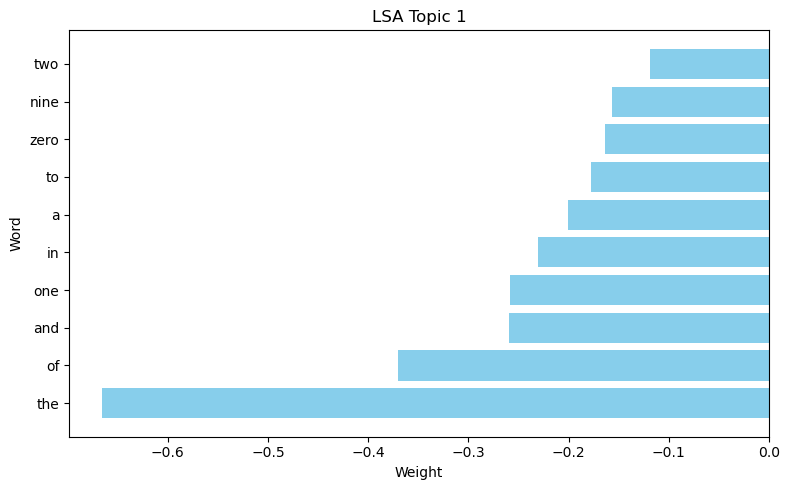

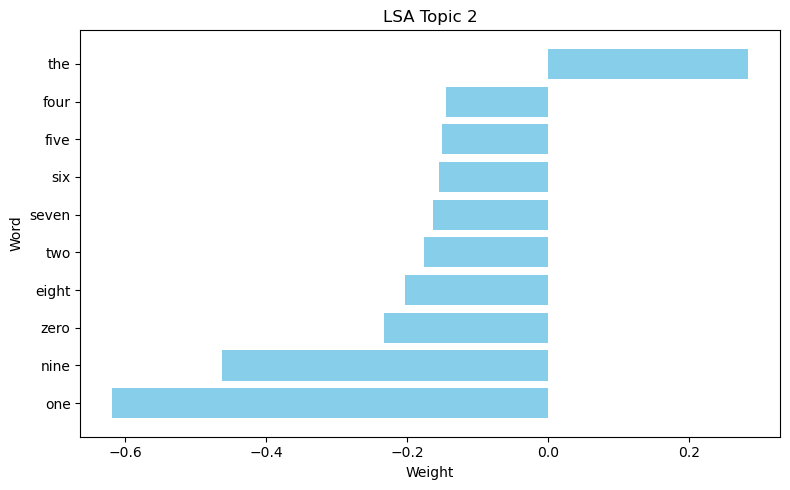

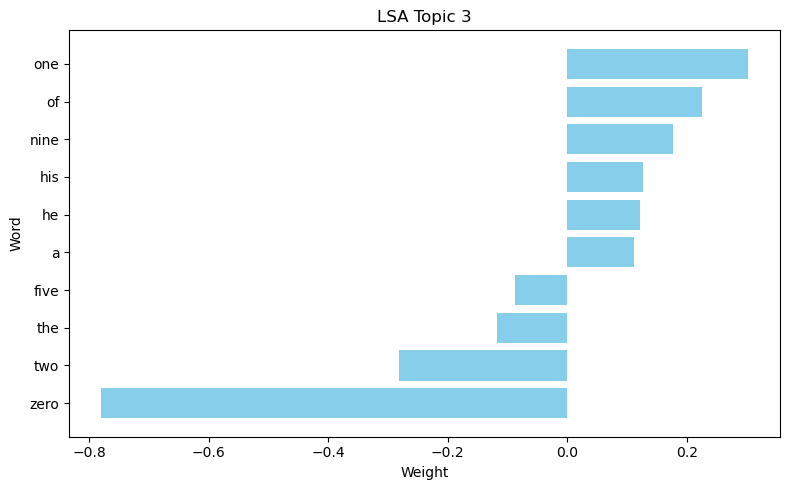

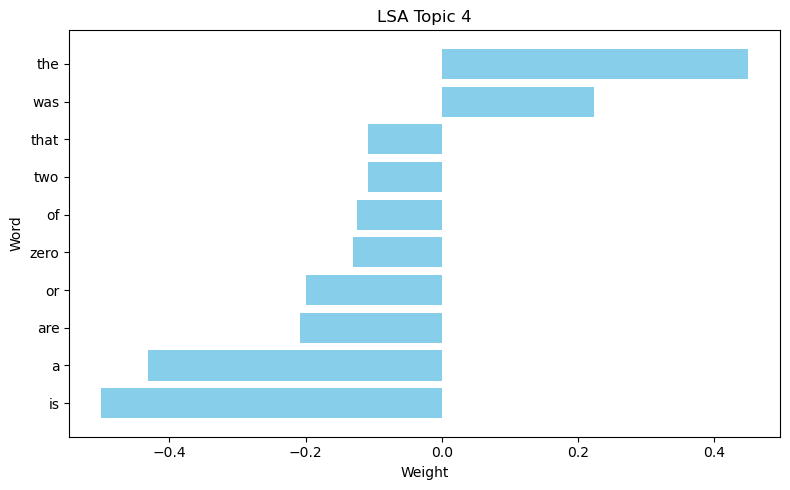

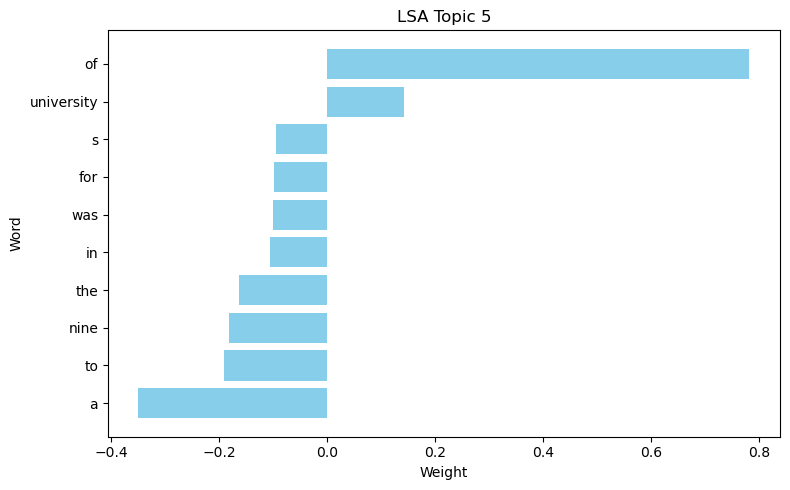

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Get topic-term weights from LSA model
topics = lsa_model.show_topics(formatted=False, num_words=10)

# Convert to a DataFrame for plotting
for topic_no, word_probs in topics:
    df = pd.DataFrame(word_probs, columns=["word", "weight"])
    df.sort_values("weight", ascending=True, inplace=True)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.barh(df["word"], df["weight"], color="skyblue")
    plt.title(f"LSA Topic {topic_no + 1}")
    plt.xlabel("Weight")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

Great question! While LDA models have built-in support in pyLDAvis, LSA (Latent Semantic Analysis) models (also known as LSI models in Gensim) are not directly supported by pyLDAvis.

However, you can still visualize LSA topics using custom methods like:

✅ Option 1: Visualize LSA with a Word-Topic Matrix (Custom Plot)
You can extract the top terms for each LSA topic and use matplotlib or seaborn to visualize them.

Option 2: Visualize LSA with t-SNE or PCA (Topic Clustering)
You can project document vectors into 2D space using t-SNE or PCA and color them by their dominant topic.

Step-by-step:
Use lsa_model[corpus] to get topic vectors for documents.

Use numpy or scikit-learn to reduce to 2D.

Use matplotlib or seaborn to plot.

Let me know if you'd like this approach written out in code.

🔴 Why pyLDAvis Doesn’t Work with LSA
pyLDAvis is built for probabilistic models like LDA.

LSA is not probabilistic—it's based on linear algebra (SVD).

So pyLDAvis can't create topic probabilities or word relevance scores needed for the interactive display.

✅ Summary
Visualization Tool	Works With	Notes
pyLDAvis	LDA only	Does not support LSA
matplotlib/seaborn	LSA, LDA	Can be used for bar plots of topics
t-SNE, PCA + Plot	LSA, LDA	Good for clustering topic-document vectors

